# Setting up the Environment

## Install Packages
All required packages are already available in Colab. If running local, make sure to install the necessary packages.

In [1]:
%pip install numpy
%pip install pandas
%pip install plotly
%pip install kaggle
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install dash
%pip install jupyter-dash

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
pio.renderers.default = "colab"

## Stylizing Plots

In [3]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

In [4]:
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [5]:
#A list of hex colours running between blue and purple
CB91_Grad_BP = ['#2cbdfe', '#2fb9fc', '#33b4fa', '#36b0f8',
                '#3aacf6', '#3da8f4', '#41a3f2', '#449ff0',
                '#489bee', '#4b97ec', '#4f92ea', '#528ee8',
                '#568ae6', '#5986e4', '#5c81e2', '#607de0',
                '#6379de', '#6775dc', '#6a70da', '#6e6cd8',
                '#7168d7', '#7564d5', '#785fd3', '#7c5bd1',
                '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1',
                '#9b35bf', '#9e31bd', '#a22cbb', '#a528b9',
                '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

In [6]:
sns.set(font='DejaVu Sans',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

plt.rcParams['axes.grid'] = False

In [7]:
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In [8]:
## Some extra functions
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}

# Dataset

We will use the data set officially maintained by Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA. [JPL Small-Body Database Search Engine](https://ssd.jpl.nasa.gov/tools/sbdb_query.html)

### Setting up Kaggle API Token

Assuming kaggle.json file exists in the current working directory.

In [9]:
%mkdir ~/.kaggle
%mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/home/adityan/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory


### Download Dataset from Kaggle

In [10]:
%mkdir asteroids
!kaggle datasets download basu369victor/prediction-of-asteroid-diameter -p ./asteroids/ --unzip
%ls -l asteroids/

mkdir: cannot create directory ‘asteroids’: File exists
 95%|██████████████████████████████████████  | 153M/161M [00:27<00:00, 8.49MB/s]
100%|████████████████████████████████████████| 161M/161M [00:27<00:00, 6.08MB/s]
total 362696
-rwxrwxrwx 1 adityan video 170117548 Oct 22 14:36 Asteroid.csv*
-rwxrwxrwx 1 adityan video 201277388 Oct 22 14:36 Asteroid_Updated.csv*


## Import Dataset using `pandas`

In [11]:
dataset_filename = './asteroids/Asteroid_Updated.csv'
df = pd.read_csv(dataset_filename)

/tmp/ipykernel_6463/3849283063.py:2: DtypeWarning:

Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.



# Exploratory Data Analysis

## General Overview

### Structure of `pandas.Dataframe`

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [13]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [14]:
df.tail()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134
839713,NaN,2.546442,0.287672,5.356238,70.709555,273.483265,1.813901,3.278983,4.063580,11.0,...,NaN,NaN,NaN,NaN,NaN,0.815280,MBA,0.242551,1484.222588,20.432959


- 31 features with 8,39,714 entries. 

## Data Distributions

- Removing entries for which diameter is null.

In [15]:
df = df[df['diameter'].notna()].reset_index(drop=True)

In [16]:
df.tail()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
137631,NaN,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,...,NaN,NaN,NaN,NaN,NaN,1.66301,MBA,0.174527,2062.713583,164.999439
137632,NaN,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,...,NaN,NaN,NaN,NaN,NaN,1.36733,MBA,0.242270,1485.943371,145.319581
137633,NaN,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,...,NaN,NaN,NaN,NaN,NaN,1.43837,MBA,0.176610,2038.391053,174.609920
137634,NaN,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,...,NaN,NaN,NaN,NaN,NaN,1.16684,MBA,0.184914,1946.853973,175.708508
137635,NaN,2.417477,0.109001,4.525668,148.244819,31.949854,2.153970,2.680984,3.758822,3458.0,...,NaN,NaN,NaN,NaN,NaN,1.15942,MBA,0.262217,1372.909600,170.888415


In [17]:
df_na = pd.DataFrame()
df_na['features'] = list(df.columns)
df_na['nulls'] = list(df.isna().sum())
df_na['uniques'] = list(df.nunique())
df_na

,features,nulls,uniques
0,name,122512,15124
1,a,0,137636
2,e,0,137636
3,i,0,137636
4,om,0,137636
5,w,0,137636
6,q,0,137636
7,ad,0,137636
8,per_y,0,137636
9,data_arc,138,18600


- Null Value Heatmap

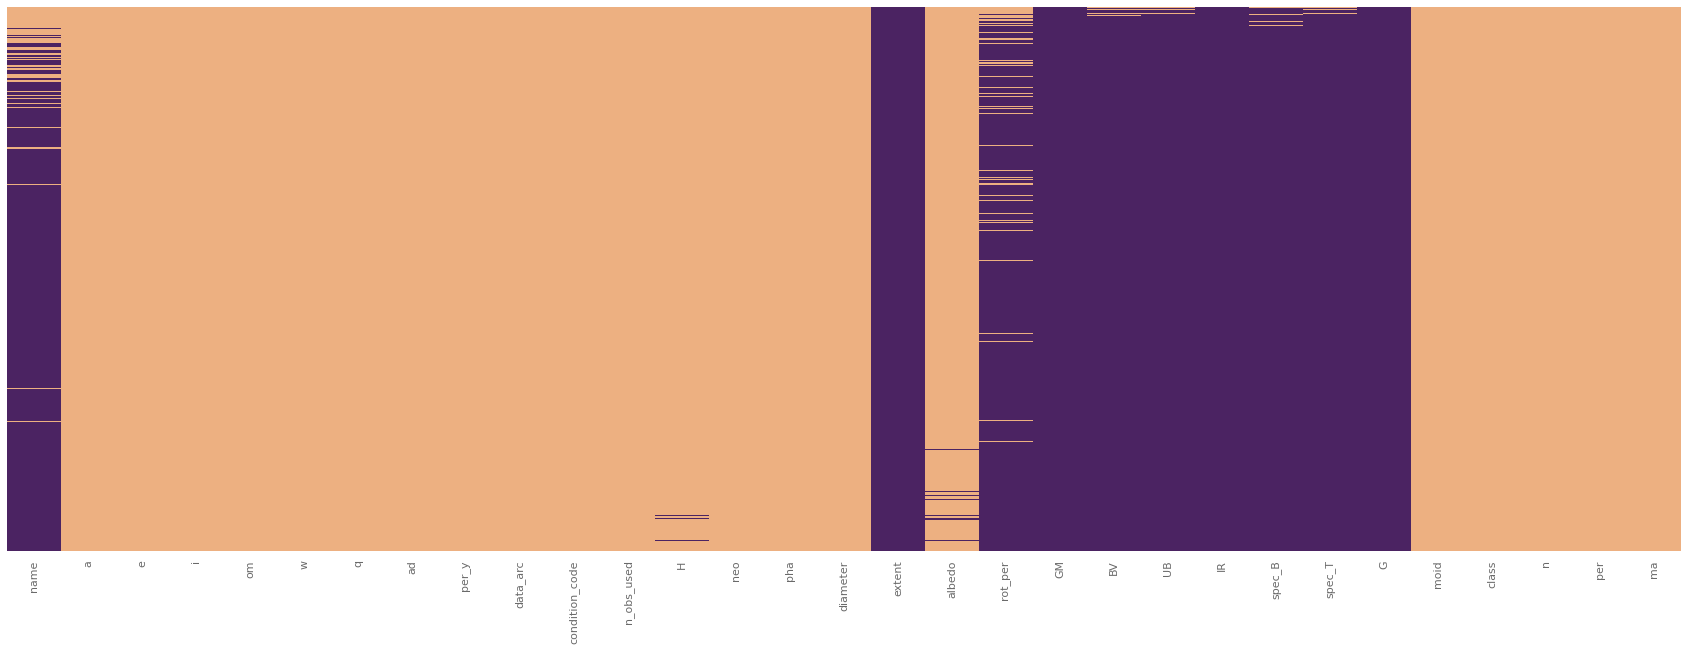

In [18]:
plt.figure(figsize=(30,10))
fig = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='flare')

- Drop features with a lot of missing values

In [19]:
df.drop(['name', 'extent', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G'],axis=1, inplace=True)

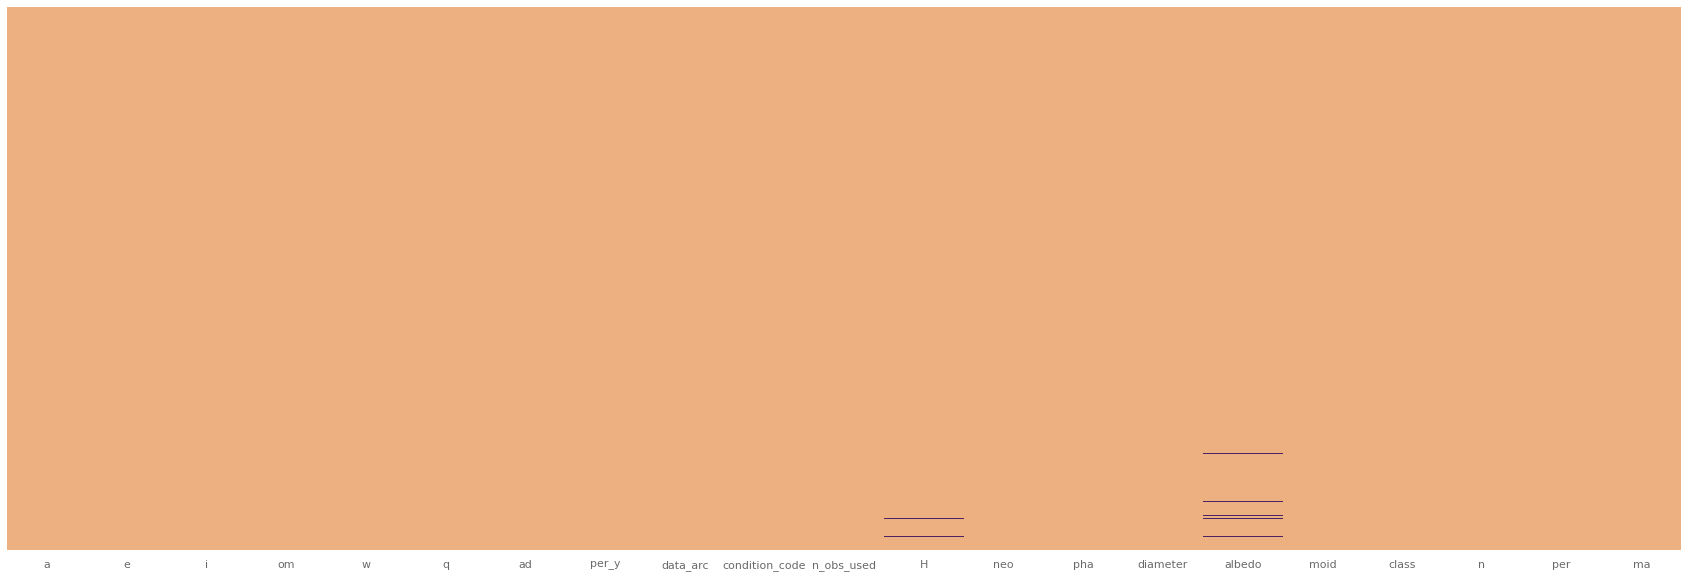

In [20]:
plt.figure(figsize=(30,10))
fig = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='flare')

`H` and `albedo` have some missing values, these can be filled later.

- Data Histogram

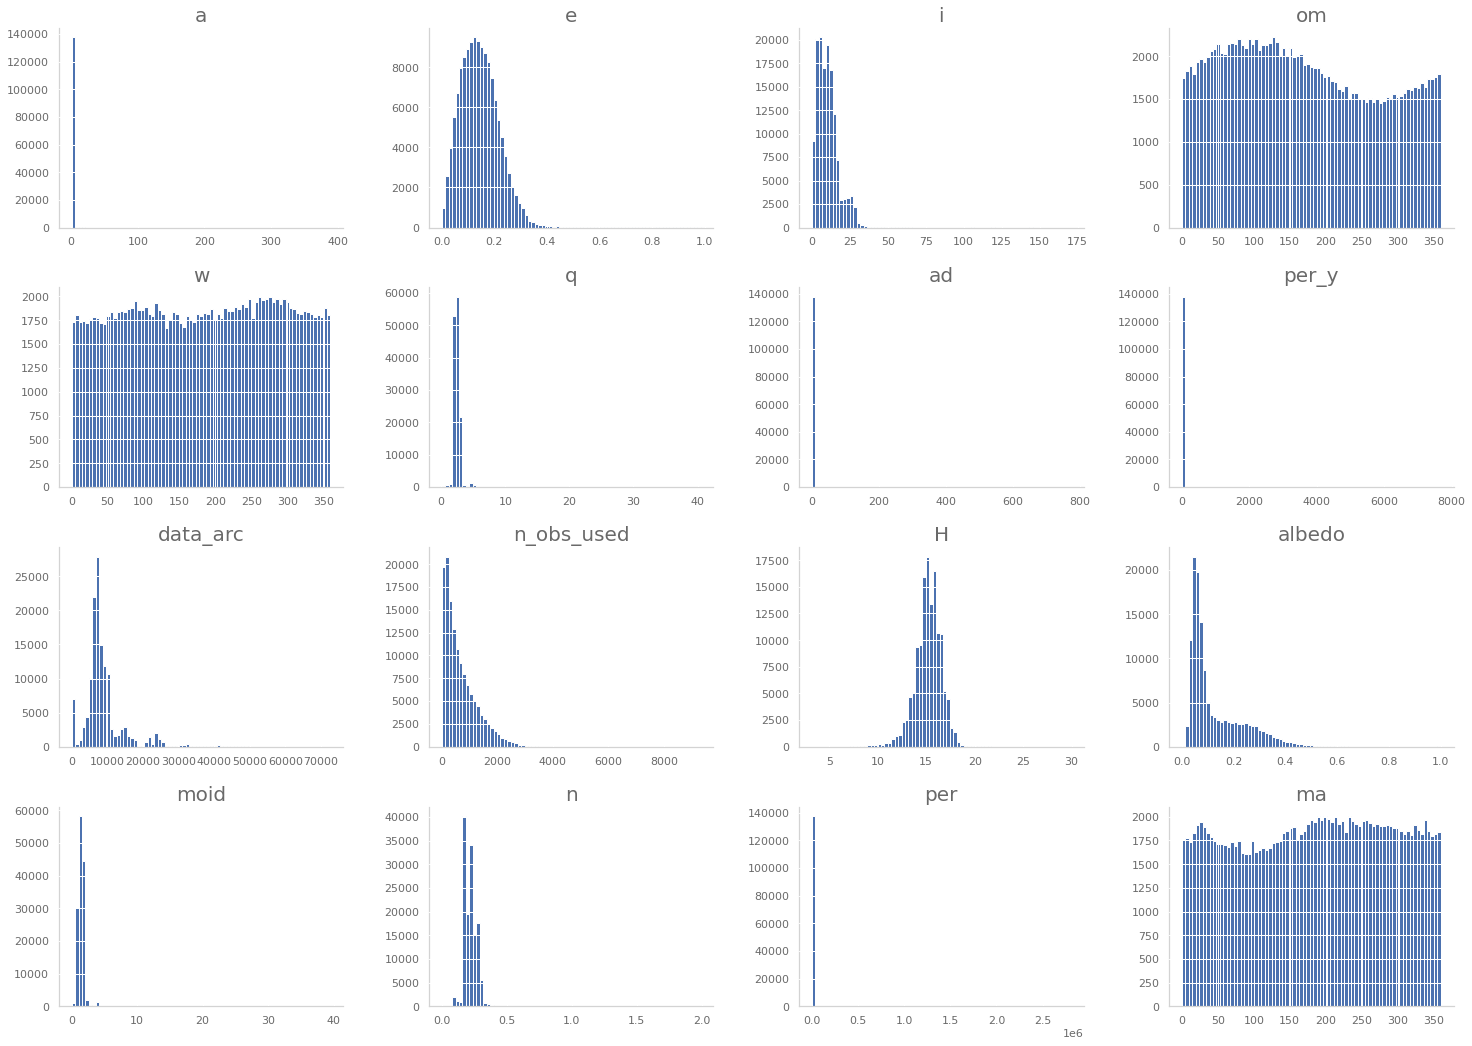

In [21]:
df.hist(bins=75,figsize=(25,18))
plt.show()

- Correlation Matrix

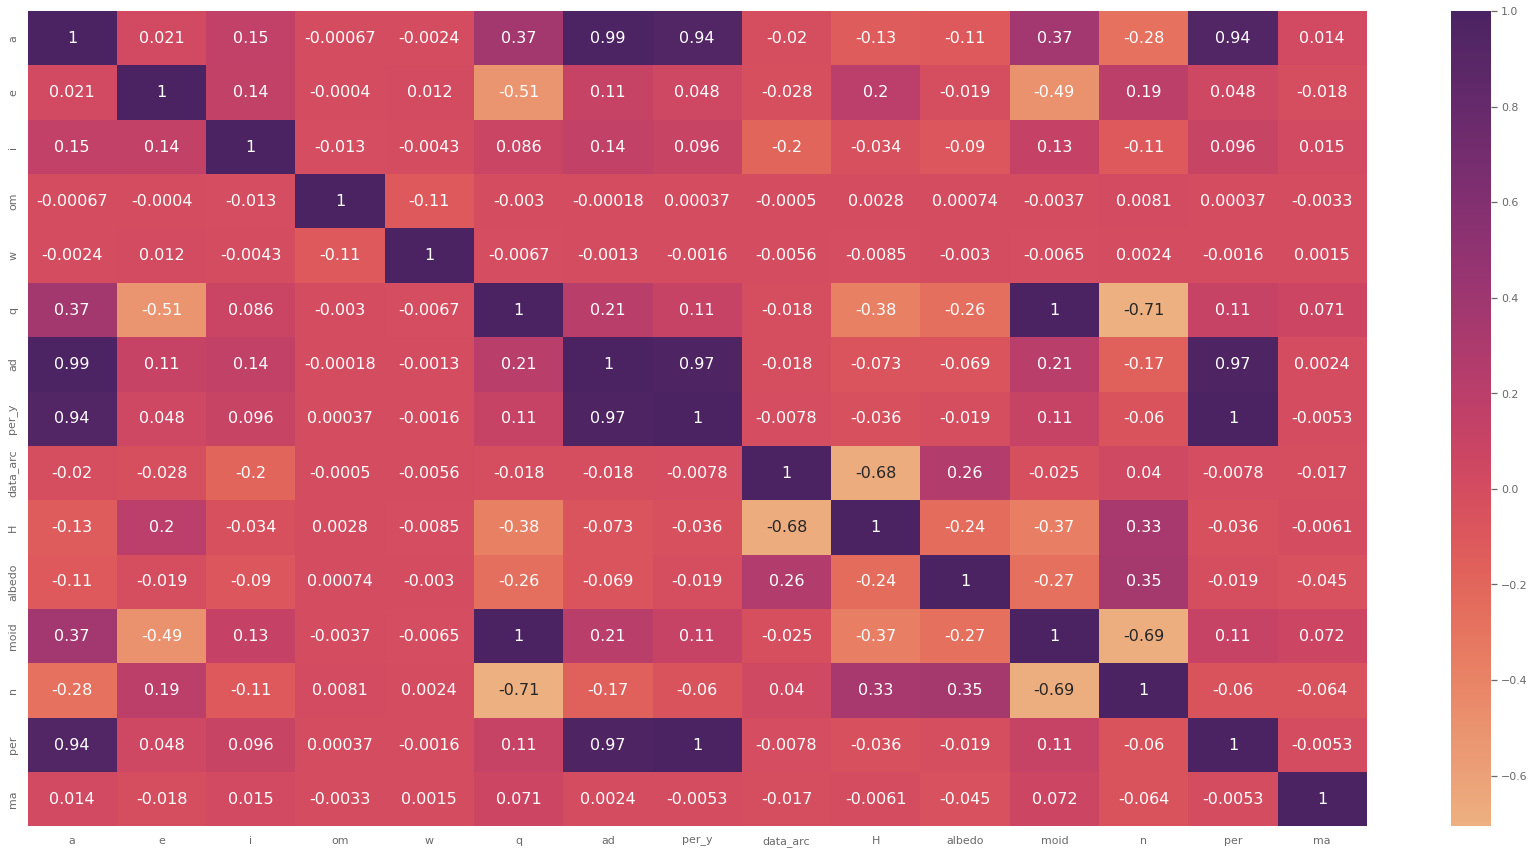

In [22]:
plt.figure(figsize=(30,15))
fig = sns.heatmap(df.select_dtypes(include='float64').corr(), cbar=True, cmap='flare', annot=True)

## Features with High Correlation


- With the following function we can select highly correlated features.
- It will remove the first feature that is correlated with any other feature.

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(df, .7)
corr_features

{'ad', 'moid', 'n_obs_used', 'per', 'per_y'}

- Removing the Highly Correlated Features

In [25]:
df.drop(corr_features, axis=1)

,a,e,i,om,w,q,data_arc,condition_code,H,neo,pha,diameter,albedo,class,n,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,8822.0,0,3.34,N,N,939.4,0.0900,MBA,0.213885,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,72318.0,0,4.13,N,N,545,0.1010,MBA,0.213503,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,72684.0,0,5.33,N,N,246.596,0.2140,MBA,0.226019,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,24288.0,0,3.20,N,N,525.4,0.4228,MBA,0.271609,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,63507.0,0,6.85,N,N,106.699,0.2740,MBA,0.238632,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137631,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,2373.0,1,16.20,N,N,3.793,0.0210,MBA,0.174527,164.999439
137632,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,3297.0,2,17.30,N,N,2.696,0.0610,MBA,0.242270,145.319581
137633,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,2839.0,1,16.80,N,N,2.917,NaN,MBA,0.176610,174.609920
137634,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,2208.0,2,17.20,N,N,3.271,0.0720,MBA,0.184914,175.708508


## Missing values and Imputation

In [26]:
df.isna().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

- Only a small part of the dataset has missing values. Hence drop the rows with missing data.

In [27]:
df = df[df['data_arc'].notna()]
df = df[df['H'].notna()]
df = df[df['albedo'].notna()]

## Handling Categorical Data

### `condition_code`

In [28]:
df['condition_code'].unique()

array([0, 1, 3, 2, '0', '1', '2', '4', '5', '9', '3', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

- Convert dtype to `int`

In [29]:
df['condition_code'] = df['condition_code'].astype(int) 
df['condition_code'].unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8])

### `pha` and `neo`

In [30]:
df['pha'].unique()

array(['N', 'Y'], dtype=object)

In [31]:
df['neo'].unique()

array(['N', 'Y'], dtype=object)

- Both `pha`, `neo` are 2 Nominals with values `Y` and `N`

In [32]:
df['phaY'] = np.where(df['pha'].str.contains('Y'), 1, 0)
df['phaN'] = np.where(df['pha'].str.contains('N'), 1, 0)
df['neoY'] = np.where(df['neo'].str.contains('Y'), 1, 0)
df['neoN'] = np.where(df['neo'].str.contains('N'), 1, 0)

In [33]:
df = df.drop(['pha', 'neo'], axis='columns')

### `class`

In [34]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

- Using One-Hot Encoding

In [35]:
dummies = pd.get_dummies(df['class'])
dummies

,AMO,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
137630,0,0,0,0,0,0,1,0,0,0,0
137631,0,0,0,0,0,0,1,0,0,0,0
137632,0,0,0,0,0,0,1,0,0,0,0
137634,0,0,0,0,0,0,1,0,0,0,0


In [36]:
df = pd.concat([df, dummies], axis='columns')
df = df.drop(['class'], axis='columns')


### `est_diameter`

From NASA website(https://cneos.jpl.nasa.gov/tools/ast_size_est.html) a formula exists to determine asteroid diameter using absolute magnitude(H) and geometric albedo(a)

$$
d = 10^{3.123-0.5\log_{10}{a}-0.2H}
$$

We can use this theoretical formula to create a new feature `est_diameter` 

In [37]:
import math
def est_diameter(a,h) :
    r=(3.1236-(0.5*math.log10(a))-(0.2*h))
    d=math.pow(10,r)
    return d

In [38]:
for index,value in df.iterrows() :
  a=value['albedo']
  h=value['H']
  df.at[index,'estimate_diameter']=est_diameter(a,h)

# Training and Testing 

- Spilt the Dataset into input and Output Dataset

In [39]:
X = df.drop(labels=['diameter'], axis=1)
Y = df['diameter']

- Split the above to training and testing Dataset 

In [40]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=64)

## Linear Regression

- Train the model

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)

LinearRegression()

- Test the Model

In [42]:
Ypred = lr.predict(Xtest)

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(Ytest,Ypred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(Ytest,Ypred)))

Mean squared error for training dataset for linear regression model is 1.668289980658958
R2 score for training dataset for linear regression model is 0.9804787292677338


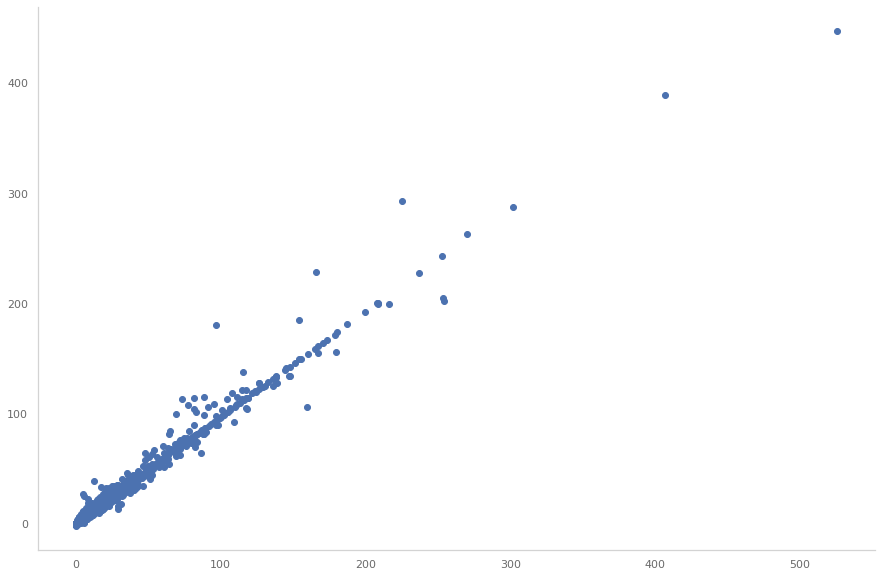

In [44]:
plt.figure(figsize=(15,10))
plt.scatter(Ytest, Ypred)

## Linear Regression with L2 Regularization (Ridge Regression)  

- Find the best parameter for (alpha)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(Xtrain.values,Ytrain.values)
print("Best paramater values are {}".format(clf.best_params_))

/home/adityan/Anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.62731e-18): result may not be accurate.

/home/adityan/Anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.65579e-18): result may not be accurate.

/home/adityan/Anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=9.26986e-18): result may not be accurate.

/home/adityan/Anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=2.38793e-17): result may not be accurate.

/home/adityan/Anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=8.65119e-18): result may not be accurate.

/home/adityan/Anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditi

Best paramater values are {'alpha': 100}


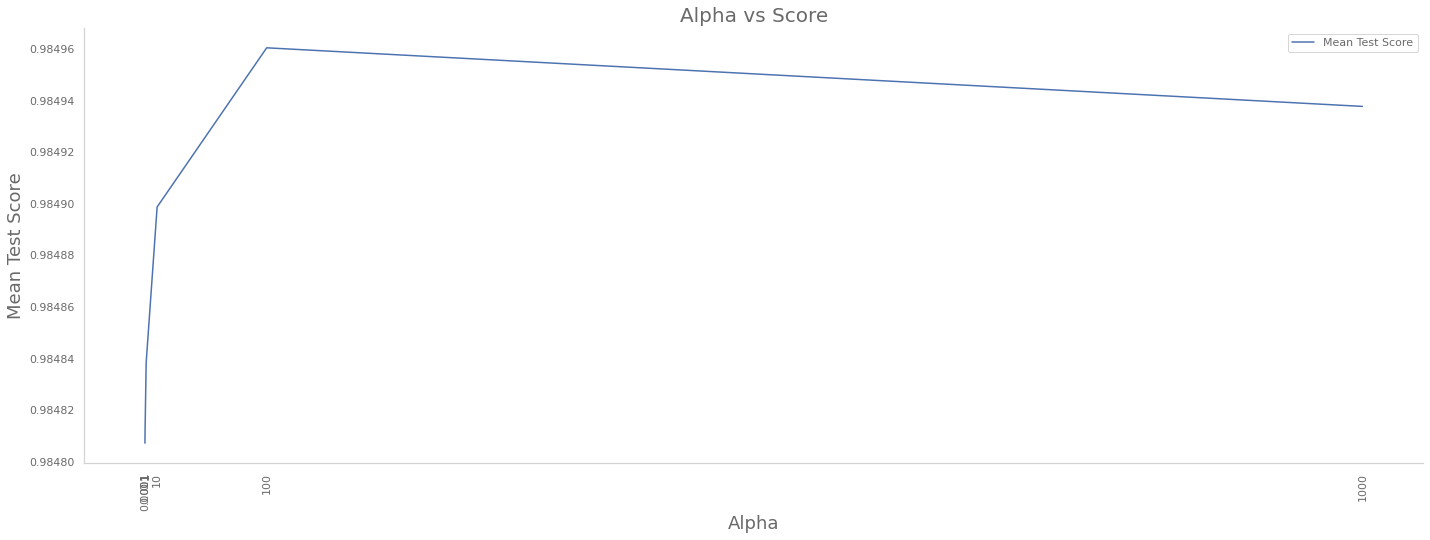

In [46]:
test_score=[]
plt.figure(figsize=(24,8))
test_score.extend(list(clf.cv_results_['mean_test_score']))
alpha=[0.0001,0.001,0.1,1,10,100,1000]
plt.plot(alpha,test_score,label='Mean Test Score')
labels=['0.0001','0.001','0.1','1','10','100','1000']
plt.xticks(alpha, labels, rotation =90)
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean Test Score")
plt.title("Alpha vs Score")
plt.show()

- Train the model

In [47]:
rid=Ridge(alpha=1000)
rid.fit(Xtrain,Ytrain)
Ypred=rid.predict(Xtest)

- Test the model

In [48]:
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(Ypred,Ytest)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(Ypred,Ytest)))

Mean squared error for training dataset for linear regression model is 1.6745546130261924
R2 score for training dataset for linear regression model is 0.9794149846560747


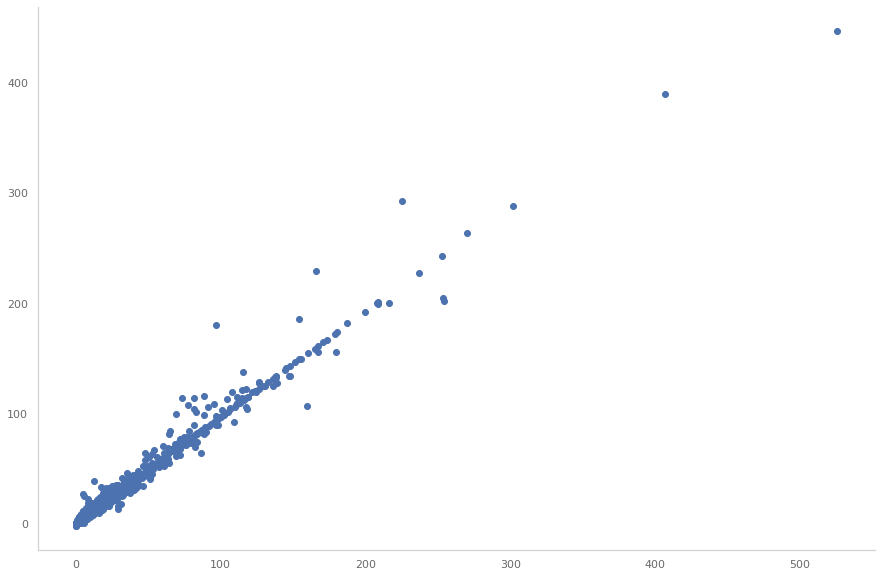

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(Ytest, Ypred)